### Pacotes

In [1]:
#Importa os pacotes necessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#### Dicionário de Variáveis utilizadas

Ano: Ano de referência

Trimestre: Trimestre de referência

UF: Estado

Capital: Capital da UF

UPA: Unidade Primária de Amostragem (UF(2) + número squencial(6) + DV(1))

V1008: Número do Domicílio

Estrato

V1014: Painel - Grupo de Amostra

V1016: Número de entrevista (1 a 5)

V2003: Número de ordem

V2007: Sexo

V2008: Dia Nascimento

V20081: Mês nascimento

V20082: Ano nascimento

V2010: Raça

V4022: Local de Trabalho

V4041: Código de Ocupação -> cruzar com a tabela COD 2010

V4044: Código da Principal atividade da empresa -> cruzar a CNAE-Domicilar

V1028: Peso do domicílio e das pessoas sem calibração

VD4019: Rendimento mensal habitual de todos os trabalhos para pessoas de 14 anos ou mais de idade

VD1029: Projeção da população

Chave para pessoa: UPA + V1008 + V1014  + V2003 + V2007 + V2008 + V20081 + V20082

**PARA ESTIMAÇÃO DOS TOTAIS, DEVE-SE USAR AS VARIÁVEIS: V1033 e posest.**

#### Importação e tratamento dos microdados

In [2]:
#determina qual diretório usar para cada sistema operacional
import os
if os.name == 'nt': #windows
    diretorio = 'C:\\Users\\est.matheus.brasil\\Documents\\Microdados PNAD Contínua\\'
else: #linux(ou mac)
    diretorio = '/home/matheus/Microdados PNAD/'



#Leitura de todas as bases com as variáveis selecionadas e criação de variáveis dinamicamente

colunas_selecionadas = ['Ano', 'Trimestre', 'UPA','Estrato', 'UF', 'V1008', 'V1014', 'V2007', 'V2008', 'V20081', 'V20082', 'V2010', 'V4022', 'V1028']

for ano in range(2019, 2023):
    for tri in range(1, 5):
        if ano == 2019  and tri > 3:
            print(ano, tri)
            globals()[f'pnad_{ano}_{tri}'] = pd.read_csv(fr'{diretorio}{ano}_{tri}.csv', usecols=colunas_selecionadas, encoding='utf-8')
        if 2019 < ano < 2022:
            print(ano, tri)
            globals()[f'pnad_{ano}_{tri}'] = pd.read_csv(fr'{diretorio}{ano}_{tri}.csv', usecols=colunas_selecionadas, encoding='utf-8')
        if ano == 2022 and tri < 3:
            print(ano, tri)
            globals()[f'pnad_{ano}_{tri}'] = pd.read_csv(fr'{diretorio}{ano}_{tri}.csv', usecols=colunas_selecionadas, encoding='utf-8')

2019 4
2020 1
2020 2
2020 3
2020 4
2021 1
2021 2
2021 3
2021 4
2022 1
2022 2


In [3]:
#Função para automalizar importação das bases da pnad com as variáveis desejadas

def importa_pnad(path, ano_inicial, ano_final, colunas):
    import traceback
    '''
    path: somente o diretório onde os arquivos estão armazenados.
    ano_inicial: ano inicial do período analisado.
    ano_final: ano final do período analisado.
    '''
    try:    
        for ano in range(ano_inicial, ano_final+1):
            for tri in range(1, 5):
                if ano == 2019  and tri > 3:
                    print(ano, tri)
                    globals()[f'pnad_{ano}_{tri}'] = pd.read_csv(fr'{path}{ano}_{tri}.csv', usecols=colunas, encoding='latin-1')
                if 2019 < ano < 2022:
                    print(ano, tri)
                    globals()[f'pnad_{ano}_{tri}'] = pd.read_csv(fr'{path}{ano}_{tri}.csv', usecols=colunas, encoding='latin-1')
                if ano == 2022 and tri < 3:
                    print(ano, tri)
                    globals()[f'pnad_{ano}_{tri}'] = pd.read_csv(fr'{path}{ano}_{tri}.csv', usecols=colunas, encoding='latin-1')
        print('Dados importados com sucesso!')
    except Exception:
        traceback.print_exc() #mostra erro em caso de problema na importação

In [4]:
#Conversão das variável V2007(sexo) para inteira. Homem = 0, Mulher = 1
for ano in range(2019, 2023):
    for tri in range(1, 5):
        if ano == 2019  and tri > 3:
            globals()[f'pnad_{ano}_{tri}']['V2007'] = np.where(globals()[f'pnad_{ano}_{tri}']['V2007'] == 'Homem', 0, 1)
        if 2019 < ano < 2022:
            globals()[f'pnad_{ano}_{tri}']['V2007'] = np.where(globals()[f'pnad_{ano}_{tri}']['V2007'] == 'Homem', 0, 1)
        if ano == 2022 and tri < 3:
            globals()[f'pnad_{ano}_{tri}']['V2007'] = np.where(globals()[f'pnad_{ano}_{tri}']['V2007'] == 'Homem', 0, 1)


In [5]:
#dataframe com a ID da pessoa e a variável de interesse

for ano in range(2019, 2023):
    for tri in range(1, 5):
        if ano == 2019  and tri > 3:
            globals()[f'pnad_{ano}_{tri}_id_local'] = pd.DataFrame(
                                                        {'Ano':globals()[f'pnad_{ano}_{tri}']['Ano'], 
                                                        'Trimestre':globals()[f'pnad_{ano}_{tri}']['Trimestre'],
                                                        'UPA':globals()[f'pnad_{ano}_{tri}']['UPA'],
                                                        'Estrato':globals()[f'pnad_{ano}_{tri}']['Estrato'],  
                                                        'V2007':globals()[f'pnad_{ano}_{tri}']['V2007'],  
                                                        'ID': globals()[f'pnad_{ano}_{tri}']['UPA'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V1008'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V1014'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V2007'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V2008'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V20081'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V20082'],
                                                        'V4022': globals()[f'pnad_{ano}_{tri}']['V4022'],
                                                        'V1028': globals()[f'pnad_{ano}_{tri}']['V1028'],
                                                      })
        if 2019 < ano < 2022:
            globals()[f'pnad_{ano}_{tri}_id_local'] = pd.DataFrame(
                                                        {'Ano':globals()[f'pnad_{ano}_{tri}']['Ano'], 
                                                        'Trimestre':globals()[f'pnad_{ano}_{tri}']['Trimestre'],
                                                        'UPA':globals()[f'pnad_{ano}_{tri}']['UPA'],
                                                        'Estrato':globals()[f'pnad_{ano}_{tri}']['Estrato'],  
                                                        'V2007':globals()[f'pnad_{ano}_{tri}']['V2007'],  
                                                        'ID': globals()[f'pnad_{ano}_{tri}']['UPA'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V1008'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V1014'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V2007'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V2008'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V20081'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V20082'],
                                                        'V4022': globals()[f'pnad_{ano}_{tri}']['V4022'],
                                                        'V1028': globals()[f'pnad_{ano}_{tri}']['V1028'],
                                                      })
        if ano == 2022 and tri < 3:
            globals()[f'pnad_{ano}_{tri}_id_local'] = pd.DataFrame(
                                                        {'Ano':globals()[f'pnad_{ano}_{tri}']['Ano'], 
                                                        'Trimestre':globals()[f'pnad_{ano}_{tri}']['Trimestre'],
                                                        'UPA':globals()[f'pnad_{ano}_{tri}']['UPA'],
                                                        'Estrato':globals()[f'pnad_{ano}_{tri}']['Estrato'],  
                                                        'V2007':globals()[f'pnad_{ano}_{tri}']['V2007'],  
                                                        'ID': globals()[f'pnad_{ano}_{tri}']['UPA'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V1008'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V1014'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V2007'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V2008'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V20081'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V20082'],
                                                        'V4022': globals()[f'pnad_{ano}_{tri}']['V4022'],
                                                        'V1028': globals()[f'pnad_{ano}_{tri}']['V1028'],
                                                      })

In [6]:
pnadc_completa = pd.concat([pnad_2019_4_id_local, 
                            pnad_2020_1_id_local, 
                            pnad_2020_2_id_local, 
                            pnad_2020_3_id_local, 
                            pnad_2020_4_id_local, 
                            pnad_2021_1_id_local, 
                            pnad_2021_2_id_local, 
                            pnad_2021_3_id_local, 
                            pnad_2021_4_id_local, 
                            pnad_2022_1_id_local, 
                            pnad_2022_2_id_local])

In [7]:
pnadc_completa.sort_values(by=['Ano', 'Trimestre'], inplace=True)

In [8]:
#concatenar coluna ano e trimestre em uma única coluna
pnadc_completa['ano_tri'] = pnadc_completa['Ano'].astype(str) + 'Q' + pnadc_completa['Trimestre'].astype(str)

In [9]:
#Conversão para o formato data e criação da coluna de Ano e Trimestre 
pnadc_completa['ano_tri'] = pd.PeriodIndex(pnadc_completa['ano_tri'], freq='Q')

In [10]:
display(pnadc_completa)

,Ano,Trimestre,UPA,Estrato,V2007,ID,V4022,V1028,ano_tri
0,2019,4,110000016,1110011,1,110002003,NaN,145.628790,2019Q4
1,2019,4,110000016,1110011,1,110002034,NaN,145.628790,2019Q4
2,2019,4,110000016,1110011,1,110002051,NaN,145.628790,2019Q4
3,2019,4,110000016,1110011,0,110002077,NaN,145.628790,2019Q4
4,2019,4,110000016,1110011,0,110002012,NaN,134.017538,2019Q4
...,...,...,...,...,...,...,...,...,...
482113,2022,2,530057544,5310220,0,530059585,NaN,81.626590,2022Q2
482114,2022,2,530057544,5310220,0,530059543,NaN,72.323502,2022Q2
482115,2022,2,530057544,5310220,0,530059578,NaN,72.323502,2022Q2
482116,2022,2,530057544,5310220,1,530059586,NaN,72.323502,2022Q2


#### Análise Exploratória (Sem expansão da amostra)

In [11]:
pd.crosstab(index=pnadc_completa['ano_tri'],
                             columns=pnadc_completa['V4022'])

V4022,"Em domicílio de empregador, patrão, sócio ou freguês",Em estabelecimento de outro négocio/empresa,"Em local designado pelo empregador, cliente ou freguês","Em outro local, especifique","Em veículo automotor (táxi, ônibus, caminhão, automóvel, embarcação, etc.)","Em via ou área pública (rua, rio, manguezal, mata pública, praça, praia etc.)","No domicílio de residência, em local exclusivo para o desempenho da atividade","No domicílio de residência, sem local exclusivo para o desempenho da atividade"
ano_tri,,,,,,,,
2019Q4,1793,2730,25829,618,8547,5869,4381,6485
2020Q1,1409,2294,22061,494,7718,5093,3907,5775
2020Q2,879,1775,14374,315,5343,2832,2980,4024
2020Q3,914,1653,14807,365,4947,2786,3184,4299
2020Q4,938,1519,14165,354,4721,2836,3397,4379
2021Q1,876,1316,13537,318,4420,2721,3401,4372
2021Q2,1025,1416,15292,368,4858,3256,4021,4959
2021Q3,1373,1741,19487,494,6129,4336,5007,6170
2021Q4,1463,1857,21155,604,6470,4602,5345,6531


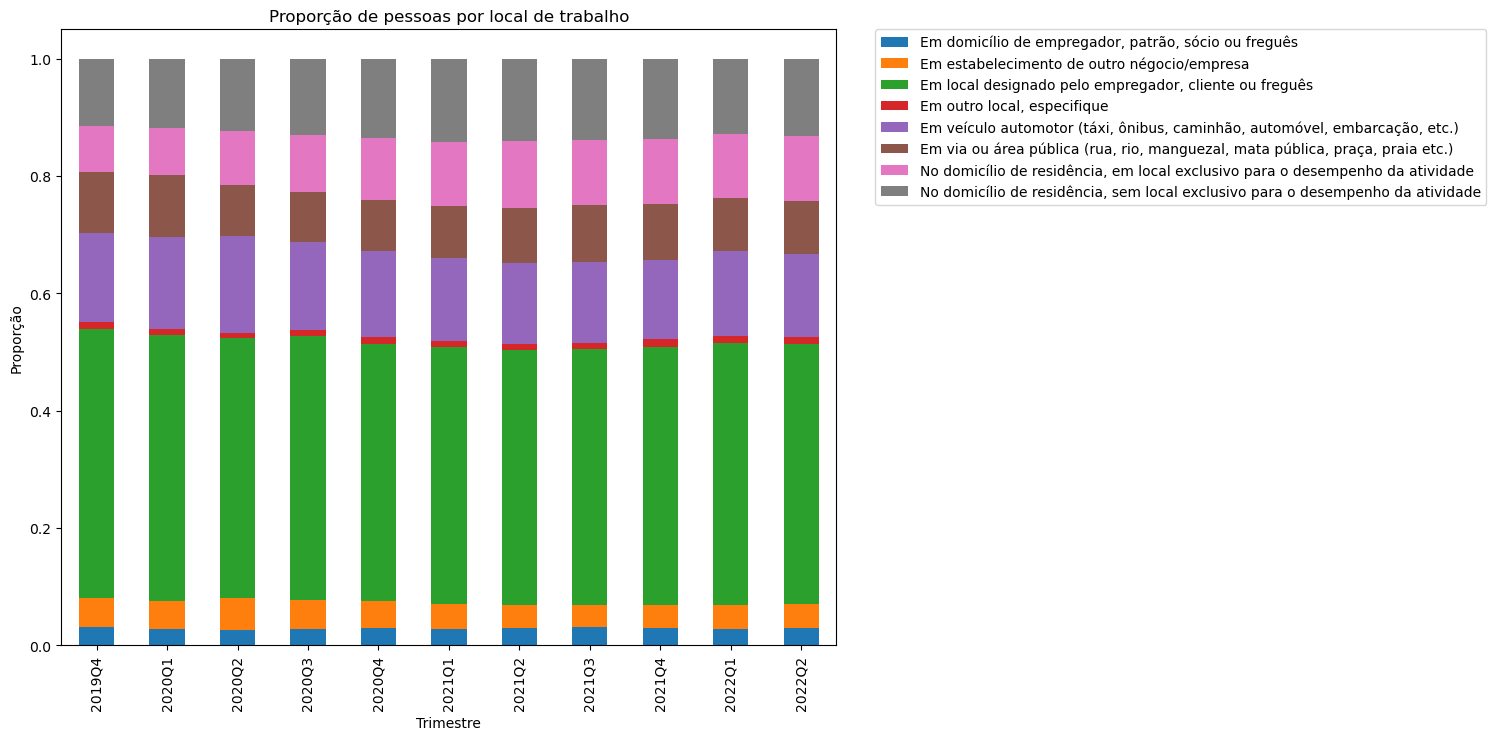

In [12]:
cross_tab_prop = pd.crosstab(index=pnadc_completa['ano_tri'],
                             columns=pnadc_completa['V4022'],
                             normalize="index")


cross_tab_prop.plot(kind='bar', stacked=True, figsize=(10, 8), title='Proporção de pessoas por local de trabalho')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Trimestre')
plt.ylabel('Proporção')

plt.show()

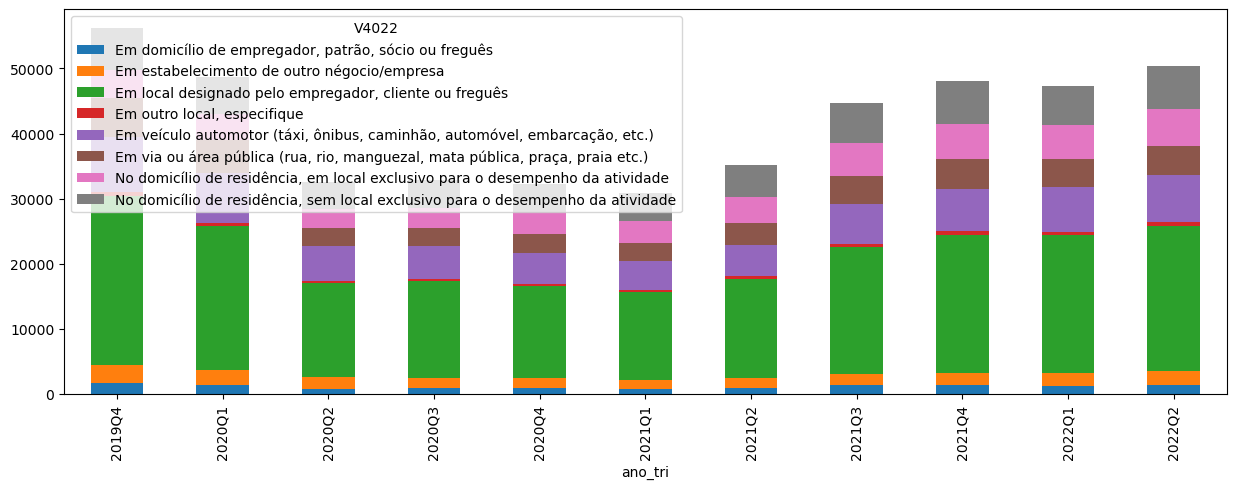

In [13]:
pnadc_completa.groupby('ano_tri')['V4022'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(15, 5))
plt.show()

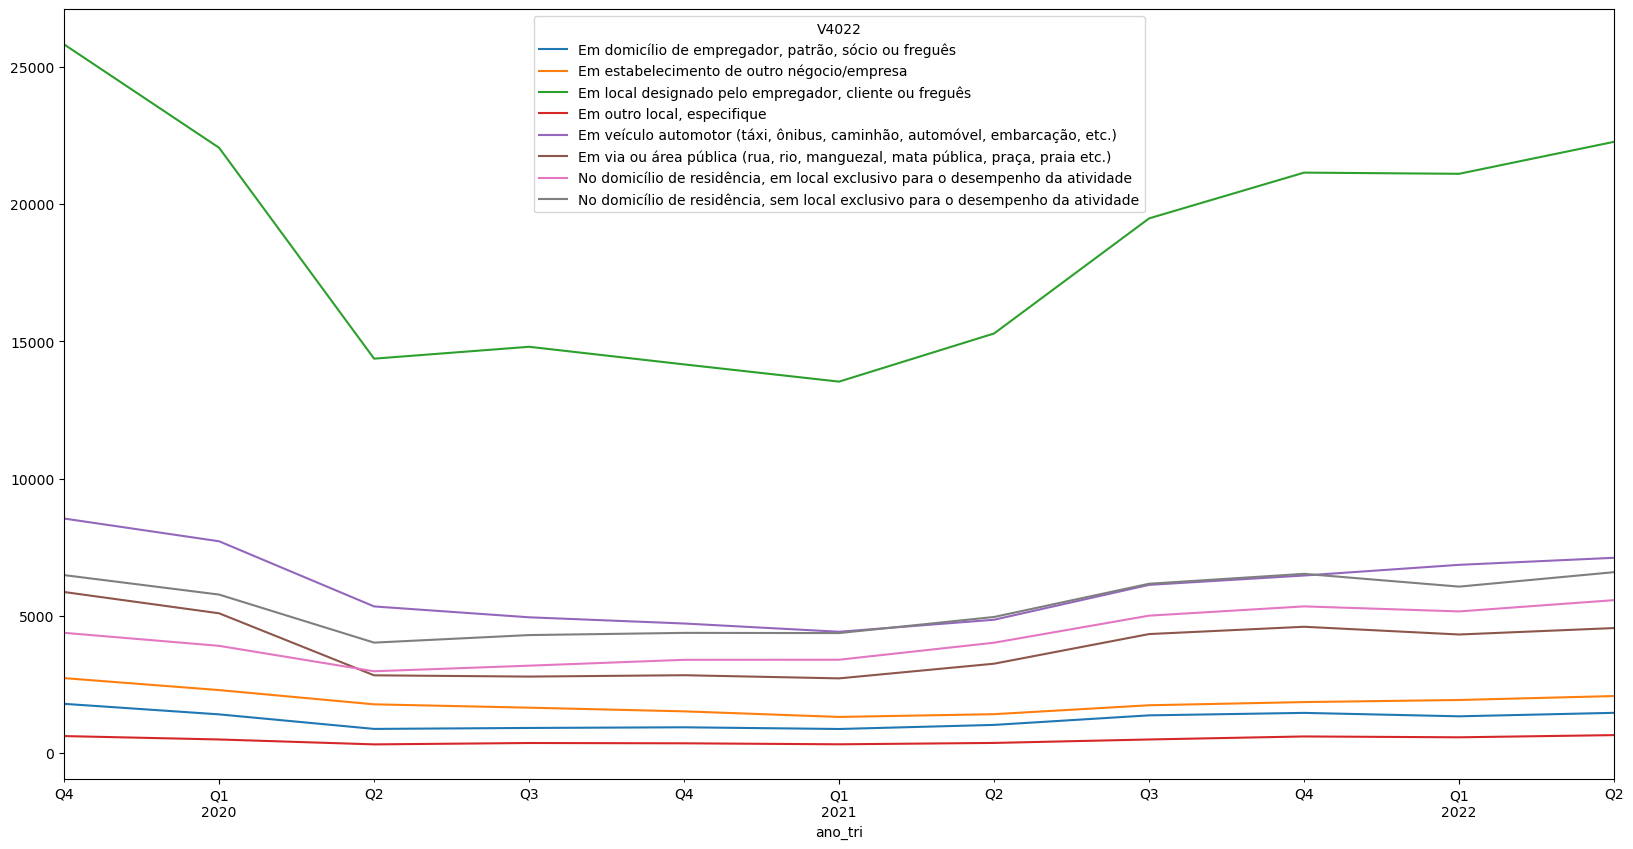

In [14]:
fig, ax = plt.subplots(figsize=(20, 10))
pnadc_completa.groupby('ano_tri')['V4022'].value_counts().unstack().plot(ax=ax)
plt.show()

### Expansão dos dados para estimar valores para a população

#### Estimação através do Samplics

In [ ]:
#Renda Média Habitual para a população em 2T2022b

from samplics.estimation import TaylorEstimator

media_rendimento = TaylorEstimator("mean")
media_rendimento.estimate(
    y=pnadc_completa[pnadc_completa['ano_tri']=='2022Q2']["VD4019"],
    samp_weight=pnadc_completa[pnadc_completa['ano_tri']=='2022Q2']["V1028"],
    stratum=pnadc_completa[pnadc_completa['ano_tri']=='2022Q2']["Estrato"],
    psu=pnadc_completa[pnadc_completa['ano_tri']=='2022Q2']["UPA"],
    remove_nan=True,
)

print(media_rendimento)

In [29]:
pnad_completa_2021 = pnadc_completa[(pnadc_completa['ano_tri'] > '2020Q4')&(pnadc_completa['ano_tri'] < '2022')].copy()

In [55]:
pnadc_completa

,Ano,Trimestre,UPA,Estrato,V2007,ID,V4022,V1028,ano_tri
0,2019,4,110000016,1110011,1,110002003,NaN,145.628790,2019Q4
1,2019,4,110000016,1110011,1,110002034,NaN,145.628790,2019Q4
2,2019,4,110000016,1110011,1,110002051,NaN,145.628790,2019Q4
3,2019,4,110000016,1110011,0,110002077,NaN,145.628790,2019Q4
4,2019,4,110000016,1110011,0,110002012,NaN,134.017538,2019Q4
...,...,...,...,...,...,...,...,...,...
482113,2022,2,530057544,5310220,0,530059585,NaN,81.626590,2022Q2
482114,2022,2,530057544,5310220,0,530059543,NaN,72.323502,2022Q2
482115,2022,2,530057544,5310220,0,530059578,NaN,72.323502,2022Q2
482116,2022,2,530057544,5310220,1,530059586,NaN,72.323502,2022Q2


In [40]:
populacao_total = TaylorEstimator("total")
populacao_total.estimate(
    y=pnad_completa_2021["ID"],
    samp_weight=pnad_completa_2021["V1028"],
    stratum=pnad_completa_2021["Estrato"],
    psu=pnad_completa_2021["ID"],
    remove_nan=True,
)

print(populacao_total)

SAMPLICS - Estimation of Total

Number of strata: 574
Number of psus: 584864
Degree of freedom: 584290

       TOTAL           SE          LCI          UCI      CV
2.745161e+17 4.830313e+14 2.735693e+17 2.754628e+17 0.00176


In [ ]:
populacao_total = TaylorEstimator("mean")
populacao_total.estimate(
    y=pnadc_completa[pnadc_completa['ano_tri']=='2022Q2']["V2001"],
    samp_weight=pnadc_completa[pnadc_completa['ano_tri']=='2022Q2']["V1028"],
    stratum=pnadc_completa[pnadc_completa['ano_tri']=='2022Q2']["Estrato"],
    psu=pnadc_completa[pnadc_completa['ano_tri']=='2022Q2']["ID"],
    remove_nan=True,
)

print(populacao_total)

SAMPLICS - Estimation of Mean

Number of strata: 573
Number of psus: 395915
Degree of freedom: 395342

    MEAN       SE      LCI      UCI       CV
3.562387 0.003394 3.555736 3.569039 0.000953


In [36]:
#Função para estimar média agrupada por alguma coluna

def weighted_average(df,data_col,weight_col,by_col):
    df['_data_times_weight'] = df[data_col]*df[weight_col]
    df['_weight_where_notnull'] = df[weight_col]*pd.notnull(df[data_col])
    g = df.groupby(by_col)
    result = g['_data_times_weight'].sum() / g['_weight_where_notnull'].sum()
    del df['_data_times_weight'], df['_weight_where_notnull']
    return result

In [69]:
pnad_22_2 = pd.read_csv('/home/matheus/Microdados PNAD/2022_2.csv', usecols=['UF','V1028','V1029','V1033','posest', 'posest_sxi'])

In [76]:
pnad_22_2.groupby('UF')['V1028'].sum() * pnad_22_2.groupby('UF')['V1033'].sum() / pnad_22_2.groupby('UF')['V1033'].sum()

UF
Acre                   9.003630e+05
Alagoas                3.369823e+06
Amapá                  8.825670e+05
Amazonas               4.155123e+06
Bahia                  1.500905e+07
Ceará                  9.282186e+06
Distrito Federal       3.125014e+06
Espírito Santo         4.142072e+06
Goiás                  7.287540e+06
Maranhão               7.150625e+06
Mato Grosso            3.546121e+06
Mato Grosso do Sul     2.792591e+06
Minas Gerais           2.149931e+07
Paraná                 1.165145e+07
Paraíba                4.054973e+06
Pará                   8.808891e+06
Pernambuco             9.665123e+06
Piauí                  3.294581e+06
Rio Grande do Norte    3.583827e+06
Rio Grande do Sul      1.148369e+07
Rio de Janeiro         1.754118e+07
Rondônia               1.820308e+06
Roraima                5.871410e+05
Santa Catarina         7.398998e+06
Sergipe                2.354903e+06
São Paulo              4.694425e+07
Tocantins              1.608382e+06
dtype: float64

In [74]:
1.165145e+07

11651450.0

In [68]:
((pnad_22_2['V1028'] * pnad_22_2['V1033']) / pnad_22_2['V1033']).sum()

213940082.06646305

**Encontrar outros questionários de outras caraterísticas**
